In [25]:
# libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## 1. The Dataset: Titanic data

#### The Titanic dataset is a classification dataset: it is used for a prediction task where the goal is to determine whether a person survived the 1912 shipwreck of the RMS Titanic. The list of attributes is as follows:

- output variable: **Survival**, 0 = did not survive, 1 = did survive
- input features:
    - **Pclass**: ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
    - **Sex**: male or female
    - **Age**: quantitative continuous variable
    - **Sibsp**: # of siblings / spouses aboard the Titanic
    - **Parch**: # of parents / children aboard the Titanic	
    - **Ticket**: ticket number
    - **Fare**: passenger fare
    - **Cabin**: cabin number
    - **Embarked**: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [26]:
df = pd.read_csv("Data/titanic_train.csv", na_values=['none'])
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.fillna('', inplace=True)
df["Age"] = df["Age"].apply(lambda x: 0 if x == "" else x)
df["Cabin"] = df["Cabin"].apply(lambda x: "Unknown" if x == "" else x)
df["Embarked"] = df["Embarked"].apply(lambda x: "Unknown" if x == "" else x)
df["Pclass"] = df["Pclass"].apply(lambda x: str(x))


train_cols = [df.columns[0]] + list(df.columns[2:])
label = df.columns[1]
X_df = df[train_cols]
y_df = df[label]

X_display = X_df.copy()

#Converting strings to integers and floats for categorical data
categorical_cols = ["Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]

for col in categorical_cols:
    X_df[col] = pd.Categorical(X_df[col])
    X_df[col] = X_df[col].cat.codes

dataset = {
    'X': X_df,
    'y': y_df
}

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,TotalFamily,Ticket,Fare,Cabin,Embarked
0,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,1,C.A. 24580,10.5000,Unknown,S
1,733,0,2,"Knight, Mr. Robert J",male,30.0,0,0,1,239855,0.0000,Unknown,S
2,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,1,348121,7.6500,F G63,S
3,728,1,3,"Mannion, Miss. Margareth",female,30.0,0,0,1,36866,7.7375,Unknown,Q
4,113,0,3,"Barton, Mr. David John",male,22.0,0,0,1,324669,8.0500,Unknown,S


In [27]:
df = pd.read_csv("Data/titanic_test.csv", na_values=['none'])
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.fillna('', inplace=True)
df["Age"] = df["Age"].apply(lambda x: 0 if x == "" else x)
df["Cabin"] = df["Cabin"].apply(lambda x: "Unknown" if x == "" else x)
df["Embarked"] = df["Embarked"].apply(lambda x: "Unknown" if x == "" else x)
df["Pclass"] = df["Pclass"].apply(lambda x: str(x))


train_cols = [df.columns[0]] + list(df.columns[2:])
label = df.columns[1]
test_X_df = df[train_cols]
test_y_df = df[label]

test_X_display = test_X_df.copy()

#Converting strings to integers and floats for categorical data
categorical_cols = ["Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]

for col in categorical_cols:
    test_X_df[col] = pd.Categorical(test_X_df[col])
    test_X_df[col] = test_X_df[col].cat.codes

dataset = {
    'X': test_X_df,
    'y': test_y_df
}

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,TotalFamily,Ticket,Fare,Cabin,Embarked
0,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,2,243847,27.0000,Unknown,S
1,763,1,3,"Barah, Mr. Hanna Assi",male,30.0,0,0,1,2663,7.2292,Unknown,C
2,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,1,347464,7.8542,Unknown,S
3,129,1,3,"Peter, Miss. Anna",female,30.0,1,1,3,2668,22.3583,F E69,C
4,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,30.0,1,1,3,F.C.C. 13529,26.2500,Unknown,S


In [28]:
# Use this cell for any data-related exploration

## 2. The Model: XGBoost

In [29]:
data_dmatrix = xgb.DMatrix(data=X_df,label=y_df)

# instantiate an XGBoost regressor object by calling the XGBRegressor() class
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# fit the XGBoost regressor 
xg_reg.fit(X_df,y_df)

[20:41:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, ...)

In [30]:
#Training accuracy
train_pred = xg_reg.predict(X_df)
train_pred = [0 if x<=0.5 else 1 for x in train_pred]
accuracy_train = round(sum(train_pred == y_df) / len(train_pred), 5)

#Test set accuracy
predictions = xg_reg.predict(test_X_df)
predictions = [0 if x <= 0.5 else 1 for x in predictions]

accuracy_test = round(sum(predictions == test_y_df) / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

# indices = [index for index, value in enumerate(zip(predictions, test_y_df.tolist())) if value[0] != value[1]]
# shuffle(indices)

The accuracy of the model on the training set is:  0.77313
The accuracy of the model on the test set is:  0.68326


### Global feature importance 

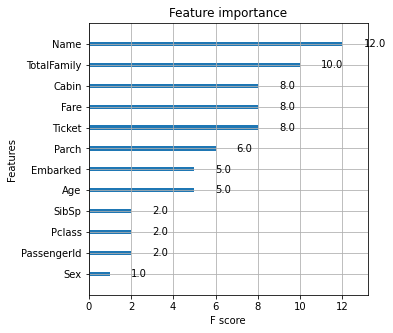

In [31]:
# Global feature importance values
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Individual features: partial dependence data

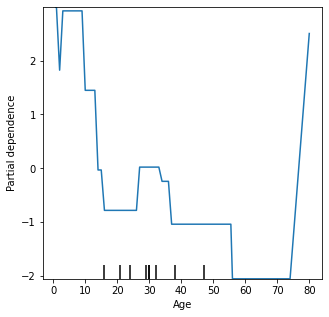

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
      max_depth=1, random_state=0).fit(X_df, y_df)
features = ["Age"]
PartialDependenceDisplay.from_estimator(clf, X_df, features)

In [33]:
# The raw values can be found below
from sklearn.inspection import partial_dependence

results = partial_dependence(clf, X_df, ["Age"])

# results["values"]
results

(array([[ 2.99313221,  2.99313221,  2.99313221,  2.99313221,  1.82115134,
          2.9212865 ,  2.9212865 ,  2.9212865 ,  2.9212865 ,  2.9212865 ,
          2.9212865 ,  2.9212865 ,  1.4473762 ,  1.4473762 ,  1.4473762 ,
          1.4473762 , -0.03044788, -0.03044788, -0.03044788, -0.77972258,
         -0.77972258, -0.77972258, -0.77972258, -0.77972258, -0.77972258,
         -0.77972258, -0.77972258, -0.77972258, -0.77972258, -0.77972258,
         -0.77972258, -0.77972258, -0.77972258,  0.02274958,  0.02274958,
          0.02274958,  0.02274958,  0.02274958,  0.02274958,  0.02274958,
          0.02274958,  0.02274958,  0.02274958, -0.24113363, -0.24113363,
         -0.24113363, -0.24113363, -1.03635708, -1.03635708, -1.03635708,
         -1.03635708, -1.03635708, -1.03635708, -1.03635708, -1.03635708,
         -1.03635708, -1.03635708, -1.03635708, -1.03635708, -1.03635708,
         -1.03635708, -1.03635708, -1.03635708, -1.03635708, -1.03635708,
         -1.03635708, -1.03635708, -1.